In [6]:
# Importing the library
from datetime import datetime,date,timedelta
from nsepy import get_history
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# fetching nifty fut data using get_history function from nsepy library
nifty_fut=get_history(symbol="NIFTY",
                      start=date(2017,12,31),
                      end=date(2017,12,31),
                      index = True,
                      expiry_date=date(2017,12,31))
niftydata=nifty_fut


,Open,High,Low,Close,Volume,Turnover
Date,,,,,,


In [3]:
#fetching option data
nifty_opt=get_history(symbol="NIFTY",
                      start=date(2017,12,31),
                      end=date(2017,12,31),
                      index = True,
                      strike_price=10000,
                      option_type="PE",
                      expiry_date=date(2017,12,31))


optiondata=nifty_opt

In [4]:
#fetching option data for mutliple expiries date through for loop
s = date(2017,12,31)
s = s + timedelta(days=1) # starting date
print(s)

expiry = [date(2018,1,25),date(2018,2,22)] # expiry dates

for x in expiry:
    expiry = x
    nifty_fut=get_history(symbol="NIFTY",
                         start = s,
                         end = x,
                         index = True,
                         futures = True,
                         expiry_date=x)
    niftydata=niftydata.append(nifty_fut)
    high= nifty_fut[["Close"]].max() # finding max price of the nifty future from starting date to expiry date
    low = nifty_fut[["Close"]].min() # finding max price of the nifty future from starting date to expiry date
    high = int((round(high/100)*100)+500)
    low = int((round(low/100)*100)-500)
    for z in range(low,high,100):
        nifty_opt_ce = get_history(symbol="NIFTY",
                               start =s,
                               end =x,
                               index =True,
                               strike_price=z,
                               option_type="CE",
                               expiry_date=x)
        #print(nifty_opt_ce.head())
        optiondata= optiondata.append(nifty_opt_ce)
        #print(optiondata1)
        nifty_opt_pe = get_history(symbol="NIFTY",
                               start=s,
                               end=x,
                               index = True,
                               strike_price=z,
                               option_type="PE",
                               expiry_date=x)
        #print(nifty_opt_pe.head())
        optiondata=optiondata.append(nifty_opt_pe)
        #print(optiondata)
    s= x + timedelta(days=1)    # most important step changing the starting date as one month expires
    


2018-01-01


In [5]:
print(optiondata)

           Symbol      Expiry Option Type  Strike Price     Open     High  \
Date                                                                        
2018-01-01  NIFTY  2018-01-25          CE       10000.0   553.10   559.80   
2018-01-02  NIFTY  2018-01-25          CE       10000.0   524.50   524.50   
2018-01-03  NIFTY  2018-01-25          CE       10000.0   508.00   542.10   
2018-01-04  NIFTY  2018-01-25          CE       10000.0   494.65   539.00   
2018-01-05  NIFTY  2018-01-25          CE       10000.0   585.25   585.45   
...           ...         ...         ...           ...      ...      ...   
2018-02-16  NIFTY  2018-02-22          PE       11500.0   903.75  1058.55   
2018-02-19  NIFTY  2018-02-22          PE       11500.0  1050.00  1194.00   
2018-02-20  NIFTY  2018-02-22          PE       11500.0  1133.35  1155.00   
2018-02-21  NIFTY  2018-02-22          PE       11500.0  1108.00  1147.55   
2018-02-22  NIFTY  2018-02-22          PE       11500.0  1142.95  1154.05   

In [6]:
print(niftydata.tail())

                Open      High       Low     Close Volume      Turnover  \
Date                                                                      
2018-02-16  10596.40  10615.00  10430.20  10453.35    NaN  1.458370e+11   
2018-02-19  10470.00  10485.00  10290.10  10378.55    NaN  1.696925e+11   
2018-02-20  10394.00  10425.85  10332.30  10343.75    NaN  1.430082e+11   
2018-02-21  10405.65  10409.85  10341.40  10392.90    NaN  1.221798e+11   
2018-02-22  10345.00  10396.00  10330.05  10381.80    NaN  1.588982e+11   

           Symbol      Expiry      Last  Settle Price  Number of Contracts  \
Date                                                                         
2018-02-16  NIFTY  2018-02-22  10442.35      10453.35             184944.0   
2018-02-19  NIFTY  2018-02-22  10375.50      10378.55             218292.0   
2018-02-20  NIFTY  2018-02-22  10340.00      10343.75             183616.0   
2018-02-21  NIFTY  2018-02-22  10389.00      10392.90             157039.0   
2018-0

<AxesSubplot:xlabel='Date'>

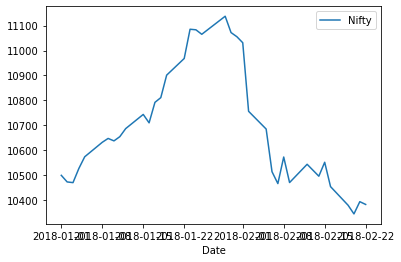

In [8]:
# creating dataframe of Nifty close only
NiftyCF = pd.DataFrame({"Nifty":niftydata["Close"]})
NiftyCF.plot()

In [9]:
# creating dataframe of option data with required columns details only
NiftyCO = pd.DataFrame({"Expiry":optiondata["Expiry"],
                       "Type":optiondata["Option Type"],
                       "Strike":optiondata["Strike Price"],
                       "Last": optiondata["Last"]})
print(NiftyCO)

                Expiry Type   Strike     Last
Date                                         
2018-01-01  2018-01-25   CE  10000.0   497.00
2018-01-02  2018-01-25   CE  10000.0   476.00
2018-01-03  2018-01-25   CE  10000.0   478.00
2018-01-04  2018-01-25   CE  10000.0   539.00
2018-01-05  2018-01-25   CE  10000.0   579.75
...                ...  ...      ...      ...
2018-02-16  2018-02-22   PE  11500.0  1040.00
2018-02-19  2018-02-22   PE  11500.0  1101.20
2018-02-20  2018-02-22   PE  11500.0  1147.95
2018-02-21  2018-02-22   PE  11500.0  1099.05
2018-02-22  2018-02-22   PE  11500.0  1106.30

[1256 rows x 4 columns]


In [10]:
# rearranging data of option strikes using pivot table fucntion
opttable = pd.pivot_table(NiftyCO,values = "Last",index=["Date","Type","Expiry"],columns=["Strike"],aggfunc=np.sum)
opttable

Strike                      9800.0   9900.0   10000.0  10100.0  10200.0  \
Date       Type Expiry                                                    
2018-01-01 CE   2018-01-25      NaN      NaN   497.00   407.45   322.80   
           PE   2018-01-25      NaN      NaN    20.00    29.00    44.30   
2018-01-02 CE   2018-01-25      NaN      NaN   476.00   387.20   305.70   
           PE   2018-01-25      NaN      NaN    22.20    33.00    49.00   
2018-01-03 CE   2018-01-25      NaN      NaN   478.00   390.00   309.35   
...                             ...      ...      ...      ...      ...   
2018-02-20 PE   2018-02-22     1.75     2.65     4.40     7.90    16.45   
2018-02-21 CE   2018-02-22   585.00   486.25   383.55   281.95   188.50   
           PE   2018-02-22     0.60     0.40     0.50     0.65     1.50   
2018-02-22 CE   2018-02-22   577.50   469.75   374.00   280.55   180.40   
           PE   2018-02-22     0.05     0.05     0.05     0.05     0.05   

Strike                      10300.0  10400.0  10500.0  10600.0  10700.0  \
Date       Type Expiry                                                    
2018-01-01 CE   2018-01-25   248.00   178.00   120.80    73.95    41.30   
           PE   2018-01-25    65.25    95.00   136.00   186.50   253.00   
2018-01-02 CE   2018-01-25   231.00   163.05   106.80    62.90    34.10   
           PE   2018-01-25    72.50   104.85   146.00   198.80   269.30   
2018-01-03 CE   2018-01-25   228.95   163.00   105.00    61.95    32.75   
...                             ...      ...      ...      ...      ...   
2018-02-20 PE   2018-02-22    37.80    84.65   167.95   259.25   356.00   
2018-02-21 CE   2018-02-22    93.90    29.70     4.05     0.40     0.35   
           PE   2018-02-22     9.00    37.60   112.95   206.60   302.65   
2018-02-22 CE   2018-02-22    75.90     0.05     0.05     0.05     0.05   
           PE   2018-02-22     0.05    13.00   117.00   217.45   303.60   

Strike                      10800.0  10900.0  11000.0  11100.0  11200.0  \
Date       Type Expiry                                                    
2018-01-01 CE   2018-01-25    21.60    10.20     5.60     2.90     2.30   
           PE   2018-01-25   332.95   413.90   510.05   586.85   690.45   
2018-01-02 CE   2018-01-25    16.60     8.10     4.80     3.00     2.10   
           PE   2018-01-25   352.85   433.25   533.80   623.00   739.00   
2018-01-03 CE   2018-01-25    16.00     7.35     4.50     2.60     2.00   
...                             ...      ...      ...      ...      ...   
2018-02-20 PE   2018-02-22   451.95   558.75   659.00   753.90   850.00   
2018-02-21 CE   2018-02-22     0.40     0.40     0.30     0.25     0.30   
           PE   2018-02-22   402.05   509.95   606.75   700.45   805.00   
2018-02-22 CE   2018-02-22     0.05     0.05     0.05     0.05     0.05   
           PE   2018-02-22   403.60   513.80   604.90   705.90   809.80   

Strike                      11300.0  11400.0  11500.0  
Date       Type Expiry                                 
2018-01-01 CE   2018-01-25     1.30     1.10     0.70  
           PE   2018-01-25   802.85   847.00  1002.00  
2018-01-02 CE   2018-01-25     1.30     0.90     0.70  
           PE   2018-01-25   849.50   930.85  1024.10  
2018-01-03 CE   2018-01-25     1.35     0.95     0.80  
...                             ...      ...      ...  
2018-02-20 PE   2018-02-22   953.00  1030.00  1147.95  
2018-02-21 CE   2018-02-22     0.35     0.10     0.15  
           PE   2018-02-22   905.40   996.00  1099.05  
2018-02-22 CE   2018-02-22     0.05     0.05     0.05  
           PE   2018-02-22   912.00  1009.25  1106.30  

[74 rows x 18 columns]

In [11]:
# joining the future prices to optiondata
opttable=opttable.join(NiftyCF)
opttable

9800.0  9900.0  10000.0  10100.0  10200.0  \
Date       Type Expiry                                                  
2018-01-01 CE   2018-01-25     NaN     NaN   497.00   407.45   322.80   
           PE   2018-01-25     NaN     NaN    20.00    29.00    44.30   
2018-01-02 CE   2018-01-25     NaN     NaN   476.00   387.20   305.70   
           PE   2018-01-25     NaN     NaN    22.20    33.00    49.00   
2018-01-03 CE   2018-01-25     NaN     NaN   478.00   390.00   309.35   
...                            ...     ...      ...      ...      ...   
2018-02-20 PE   2018-02-22    1.75    2.65     4.40     7.90    16.45   
2018-02-21 CE   2018-02-22  585.00  486.25   383.55   281.95   188.50   
           PE   2018-02-22    0.60    0.40     0.50     0.65     1.50   
2018-02-22 CE   2018-02-22  577.50  469.75   374.00   280.55   180.40   
           PE   2018-02-22    0.05    0.05     0.05     0.05     0.05   

                            10300.0  10400.0  10500.0  10600.0  10700.0  \
Date       Type Expiry                                                    
2018-01-01 CE   2018-01-25   248.00   178.00   120.80    73.95    41.30   
           PE   2018-01-25    65.25    95.00   136.00   186.50   253.00   
2018-01-02 CE   2018-01-25   231.00   163.05   106.80    62.90    34.10   
           PE   2018-01-25    72.50   104.85   146.00   198.80   269.30   
2018-01-03 CE   2018-01-25   228.95   163.00   105.00    61.95    32.75   
...                             ...      ...      ...      ...      ...   
2018-02-20 PE   2018-02-22    37.80    84.65   167.95   259.25   356.00   
2018-02-21 CE   2018-02-22    93.90    29.70     4.05     0.40     0.35   
           PE   2018-02-22     9.00    37.60   112.95   206.60   302.65   
2018-02-22 CE   2018-02-22    75.90     0.05     0.05     0.05     0.05   
           PE   2018-02-22     0.05    13.00   117.00   217.45   303.60   

                            10800.0  10900.0  11000.0  11100.0  11200.0  \
Date       Type Expiry                                                    
2018-01-01 CE   2018-01-25    21.60    10.20     5.60     2.90     2.30   
           PE   2018-01-25   332.95   413.90   510.05   586.85   690.45   
2018-01-02 CE   2018-01-25    16.60     8.10     4.80     3.00     2.10   
           PE   2018-01-25   352.85   433.25   533.80   623.00   739.00   
2018-01-03 CE   2018-01-25    16.00     7.35     4.50     2.60     2.00   
...                             ...      ...      ...      ...      ...   
2018-02-20 PE   2018-02-22   451.95   558.75   659.00   753.90   850.00   
2018-02-21 CE   2018-02-22     0.40     0.40     0.30     0.25     0.30   
           PE   2018-02-22   402.05   509.95   606.75   700.45   805.00   
2018-02-22 CE   2018-02-22     0.05     0.05     0.05     0.05     0.05   
           PE   2018-02-22   403.60   513.80   604.90   705.90   809.80   

                            11300.0  11400.0  11500.0     Nifty  
Date       Type Expiry                                           
2018-01-01 CE   2018-01-25     1.30     1.10     0.70  10498.70  
           PE   2018-01-25   802.85   847.00  1002.00  10498.70  
2018-01-02 CE   2018-01-25     1.30     0.90     0.70  10472.20  
           PE   2018-01-25   849.50   930.85  1024.10  10472.20  
2018-01-03 CE   2018-01-25     1.35     0.95     0.80  10469.40  
...                             ...      ...      ...       ...  
2018-02-20 PE   2018-02-22   953.00  1030.00  1147.95  10343.75  
2018-02-21 CE   2018-02-22     0.35     0.10     0.15  10392.90  
           PE   2018-02-22   905.40   996.00  1099.05  10392.90  
2018-02-22 CE   2018-02-22     0.05     0.05     0.05  10381.80  
           PE   2018-02-22   912.00  1009.25  1106.30  10381.80  

[74 rows x 19 columns]

In [12]:
opttable.to_csv("Optionpivot.csv",index=True,encoding="utf8")